In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('C:/Users/acerpc/Desktop/dv_response_train.csv',skipinitialspace=True)
test = pd.read_csv('C:/Users/acerpc/Desktop/dv_response_test.csv',skipinitialspace=True)
train.head()

,dv_response,em_last_open,order_num,web_month,em_address_num,rev_persys,month_gap,total_rev,last_order_dpa
0,1,NaN,3,17.748507,2.0,1365.653750,64.451613,5462.615,1
1,0,1.939665,1,17.864397,2.0,558.308167,81.322581,3349.849,0
2,0,6.548387,1,NaN,2.0,817.960000,0.000000,817.960,0
3,0,NaN,2,5.939665,2.0,1468.300667,86.451613,4404.902,0
4,1,NaN,7,0.459379,2.0,1999.790000,83.451613,1999.790,0


In [3]:
train.describe(include='all')

,dv_response,em_last_open,order_num,web_month,em_address_num,rev_persys,month_gap,total_rev,last_order_dpa
count,65932.000000,44267.000000,65932.000000,47430.000000,61186.000000,5.448400e+04,65932.000000,6.593200e+04,65932.000000
mean,0.313019,12.315188,2.069860,4.645520,2.291112,1.421214e+03,52.571222,3.189113e+03,0.319693
std,0.463726,15.397773,1.883022,4.884998,6.232029,1.411669e+04,38.005433,2.703791e+04,0.466361
min,0.000000,0.000597,1.000000,0.000597,0.000000,2.398000e+01,0.000000,0.000000e+00,0.000000
25%,0.000000,0.709677,1.000000,0.618877,1.000000,8.139600e+02,10.806452,8.253762e+02,0.000000
50%,0.000000,5.305854,1.000000,2.839008,2.000000,1.161603e+03,60.258065,1.896540e+03,0.000000
75%,1.000000,18.784050,2.000000,7.484319,3.000000,1.655027e+03,85.161290,3.728509e+03,1.000000
max,1.000000,69.000000,11.000000,23.000000,692.000000,3.289671e+06,185.225806,6.579342e+06,1.000000


In [4]:
test.head(10)

,em_last_open,order_num,web_month,em_address_num,rev_persys,month_gap,total_rev,last_order_dpa
0,NaN,1,2.175627,2.0,1161.574000,46.451613,1161.574,0
1,0.474313,1,0.563321,2.0,1730.405333,83.677419,10382.432,0
2,0.484468,4,1.568698,1.0,1184.756400,100.419355,5923.782,1
3,NaN,2,1.000000,1.0,1222.884667,97.354839,3668.654,1
4,NaN,1,0.483871,1.0,1108.526333,73.419355,3325.579,1
5,NaN,1,18.043011,1.0,359.000000,0.000000,359.000,0
6,0.724612,9,0.155914,2.0,1755.393000,60.870968,5266.179,1
7,NaN,1,NaN,1.0,NaN,0.000000,2528.990,0
8,47.056750,1,4.384110,5.0,1358.331250,96.419355,5433.325,0
9,NaN,1,NaN,1.0,1516.990000,0.000000,1516.990,0


In [5]:
test.describe(include='all')

,em_last_open,order_num,web_month,em_address_num,rev_persys,month_gap,total_rev,last_order_dpa
count,18972.000000,28257.000000,20210.000000,26269.000000,23383.000000,28257.000000,2.825700e+04,28257.000000
mean,12.434991,2.073044,4.612456,2.226084,1356.533835,52.346384,3.097612e+03,0.318541
std,15.369859,1.893124,4.834656,4.036722,953.234705,38.023082,1.235360e+04,0.465919
min,0.000597,1.000000,0.000597,0.000000,29.990000,0.000000,0.000000e+00,0.000000
25%,0.709379,1.000000,0.617832,1.000000,808.216375,10.225806,8.219700e+02,0.000000
50%,5.571386,1.000000,2.813321,2.000000,1154.482600,59.806452,1.914117e+03,0.000000
75%,19.124253,2.000000,7.453405,3.000000,1645.706571,84.967742,3.713566e+03,1.000000
max,66.768220,11.000000,22.947431,239.000000,59342.554000,190.290323,1.777532e+06,1.000000


In [6]:
#处理缺失值
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan,strategy='mean',axis=0)
data = pd.DataFrame(imputer.fit_transform(train[['em_last_open', 'web_month']]),columns=['em_last_open', 'web_month'])
train[['em_last_open', 'web_month']]=data
train.fillna(0,inplace=True)
train.head()

,dv_response,em_last_open,order_num,web_month,em_address_num,rev_persys,month_gap,total_rev,last_order_dpa
0,1,12.315188,3,17.748507,2.0,1365.653750,64.451613,5462.615,1
1,0,1.939665,1,17.864397,2.0,558.308167,81.322581,3349.849,0
2,0,6.548387,1,4.645520,2.0,817.960000,0.000000,817.960,0
3,0,12.315188,2,5.939665,2.0,1468.300667,86.451613,4404.902,0
4,1,12.315188,7,0.459379,2.0,1999.790000,83.451613,1999.790,0


In [7]:
test['em_last_open'].fillna(train['em_last_open'].mean(),inplace=True)
test['web_month'].fillna(train['web_month'].mean(),inplace=True)
test.fillna(0,inplace=True)
test.head()

,em_last_open,order_num,web_month,em_address_num,rev_persys,month_gap,total_rev,last_order_dpa
0,12.315188,1,2.175627,2.0,1161.574000,46.451613,1161.574,0
1,0.474313,1,0.563321,2.0,1730.405333,83.677419,10382.432,0
2,0.484468,4,1.568698,1.0,1184.756400,100.419355,5923.782,1
3,12.315188,2,1.000000,1.0,1222.884667,97.354839,3668.654,1
4,12.315188,1,0.483871,1.0,1108.526333,73.419355,3325.579,1


In [8]:
train.describe(include='all')

,dv_response,em_last_open,order_num,web_month,em_address_num,rev_persys,month_gap,total_rev,last_order_dpa
count,65932.000000,65932.000000,65932.000000,65932.000000,65932.000000,6.593200e+04,65932.000000,6.593200e+04,65932.000000
mean,0.313019,12.315188,2.069860,4.645520,2.126191,1.174444e+03,52.571222,3.189113e+03,0.319693
std,0.463726,12.616771,1.883022,4.143254,6.032670,1.284401e+04,38.005433,2.703791e+04,0.466361
min,0.000000,0.000597,1.000000,0.000597,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,2.111708,1.000000,1.210275,1.000000,5.869631e+02,10.806452,8.253762e+02,0.000000
50%,0.000000,12.315188,1.000000,4.645520,2.000000,1.007924e+03,60.258065,1.896540e+03,0.000000
75%,1.000000,12.315188,2.000000,5.368728,2.000000,1.522316e+03,85.161290,3.728509e+03,1.000000
max,1.000000,69.000000,11.000000,23.000000,692.000000,3.289671e+06,185.225806,6.579342e+06,1.000000


In [9]:
y_col = train.columns[0]
x_continuous_cols = train.columns[1:8]
x_discere_cols = train.columns[8:]
x_cols = x_continuous_cols.append(x_discere_cols)


In [10]:
from sklearn.model_selection import train_test_split
train1_x,test1_x,train1_y,test1_y=train_test_split(train[x_cols],train[y_col],train_size=0.6,random_state=2)


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
#使用后退法进行特征选择
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def rfecv(train_x,train_y,test_x,test_y):
    lr = LogisticRegression()
    model = RFECV(lr,scoring='accuracy',cv=5,n_jobs=-1)
    model.fit(train_x,train_y)
    test_pre = model.predict(test_x)
    score = accuracy_score(test_y,test_pre)
    return model,score


In [12]:
model1,score1 = rfecv(train1_x[x_cols],train1_y,test1_x[x_cols],test1_y)
score1

0.7418951200091002

In [13]:
#每消除一个变量后的交叉验证得分
model1.grid_scores_

array([0.68616497, 0.73229864, 0.73518035, 0.7365454 , 0.73770819,
       0.73803681, 0.73816319, 0.73796098])

In [14]:
model1.ranking_

array([1, 1, 1, 1, 1, 1, 2, 1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D6BDDD0B8>,
      dtype=object)

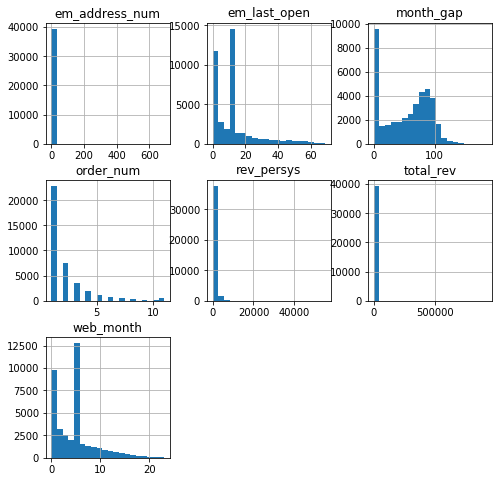

In [15]:
train1_x.loc[:, 'em_last_open':'total_rev'].hist(figsize=(8,8),bins=20)

In [16]:
#使用对数函数对连续变量进行变换
from sklearn.preprocessing import FunctionTransformer
#trainsform train
ft = FunctionTransformer(np.log1p)
train_tf = ft.fit_transform(train1_x[x_continuous_cols])
train_tf = pd.DataFrame(train_tf,columns=x_continuous_cols,index=train1_x.index)
train = train_tf.join(train1_x[x_discere_cols]).join(train1_y)
#trainsform test 
test1_tf = ft.transform(test1_x[x_continuous_cols])
test1_tf = pd.DataFrame(test1_tf,columns=x_continuous_cols,index=test1_x.index)
test12 = test1_tf.join(test1_x[x_discere_cols]).join(test1_y)

In [17]:
#预测集转换
test_tf = ft.transform(test[x_continuous_cols])
test_tf = pd.DataFrame(test_tf,columns=x_continuous_cols)
test2 = test_tf.join(test[x_discere_cols])

In [18]:
train2[x_cols].head()

,em_last_open,order_num,web_month,em_address_num,rev_persys,month_gap,total_rev,last_order_dpa
48334,3.322881,1.098612,2.549716,0.693147,0.000000,3.746083,7.319746,0
11038,2.588905,0.693147,1.730862,0.000000,6.539528,3.022782,6.539528,0
57698,1.715658,1.098612,1.359812,1.945910,6.787365,4.672527,8.172813,0
58434,4.032452,0.693147,1.901679,1.386294,7.524100,4.616397,7.524100,0
55070,3.222763,1.098612,0.179430,1.609438,7.669430,4.320923,7.669430,0


In [19]:
model2,score2 = rfecv(train2[x_cols],train2[y_col],test12[x_cols],test12[y_col])
score2

0.7467485686118379

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D6D2FD6A0>,
      dtype=object)

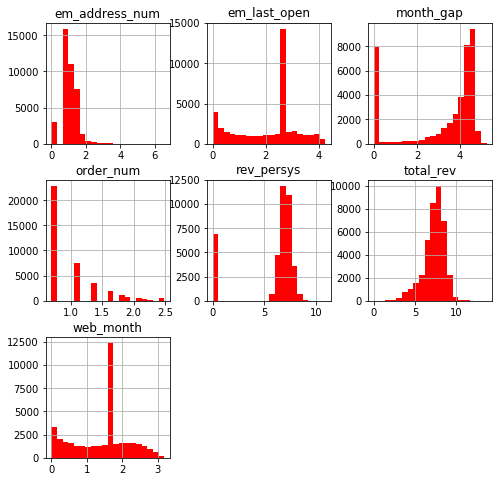

In [20]:
train2.loc[:,'em_last_open':'total_rev'].hist(figsize=(8,8),bins=20,color='r')

In [21]:
#标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#std train
train2_s = ss.fit_transform(train2[x_continuous_cols])
train2_s = pd.DataFrame(train2_s,columns=x_continuous_cols,index=train2.index)
train3 = train2_s.join(train2[x_discere_cols]).join(train2[y_col])

#std test
test12_s = ss.transform(test12[x_continuous_cols])
test12_s = pd.DataFrame(test12_s,columns=x_continuous_cols,index=test12.index)
test13 = test12_s.join(test12[x_discere_cols]).join(test12[y_col])

In [48]:
#预测及标准化
test_s = ss.fit_transform(test2[x_continuous_cols])
test_s = pd.DataFrame(test_s,columns=x_continuous_cols,index=test2.index)
test3 = test_s.join(test2[x_discere_cols])

In [22]:
model3,score3 = rfecv(train3[x_cols],train3[y_col],test13[x_cols],test13[y_col])
score3

0.7464831456413756

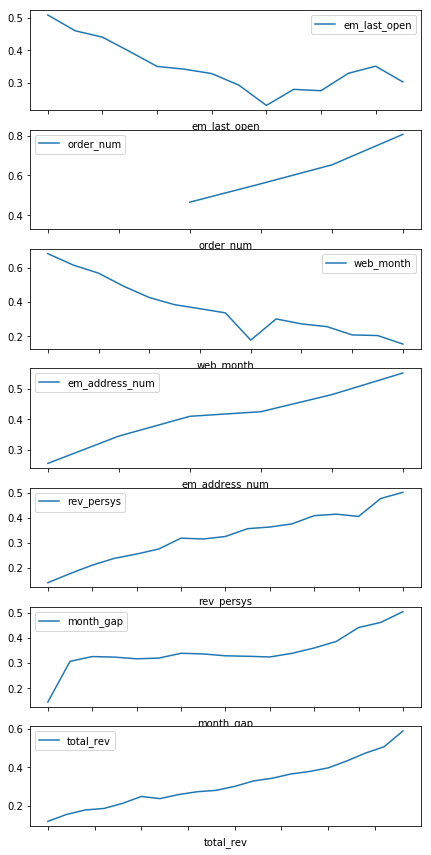

In [26]:
#离散化
dv_ratio = {}

for col in x_continuous_cols:
    bins = train3[col].quantile(np.arange(0,1.05,0.05))
    bins = sorted(list(set(bins)))#集合set去重 
    cut = pd.cut(train3[col],bins)
    recall = train3[y_col].groupby(cut).mean()
    dv_ratio[col] = recall
    
n_cols = len(x_continuous_cols)
plt.figure(figsize=[7,15])
for i, col in zip(range(1, n_cols+1), x_continuous_cols):
    plt.subplot(n_cols * 100 + 10 + i)
    dv_ratio[col].plot(label=col, legend=True)
plt.show()

In [38]:
#离散化后进行woe打分或哑变量变换
import os
os.chdir('C:/Users/acerpc/Desktop/data_folder')
from woe import WoE
woe_dic = {}
train4 = train3.copy();test14=test13.copy()
for col in x_cols:
    if col in x_continuous_cols:
        bins = train4[col].quantile(np.arange(0,1.05,0.05))
        bins = sorted(list(set(bins)))
        woe = WoE(v_type='c',bins=bins,t_type='b')#t_type:Y变量是二分类变量，bionari
        woe.fit(train4[col],train4[y_col])
    else:
        woe = WoE(v_type='d',t_type='b')
        woe.fit(train4[col],train4[y_col])
    woe_dic[col] = woe#往字典传入模型

C:\Users\acerpc\Desktop\data_folder\woe.py:150: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  stat = self.df.groupby("labels")['Y'].agg({'mean': np.mean, 'bad': np.count_nonzero, 'obs': np.size}).copy()


In [39]:
for col in x_cols:
    train4[col] = woe_dic[col].transform(train4[col])['woe']
    test14[col] = woe_dic[col].transform(test14[col])['woe']
    

In [40]:
for k,v in woe_dic.items():
    print(k,v.iv)

em_last_open 0.14524458733070134
order_num 0.6510824283635921
web_month 0.5508261652004263
em_address_num 0.21755510690357052
rev_persys 0.1996809956854549
month_gap 0.27182100825561184
total_rev 0.3301261272025927
last_order_dpa 0.16981925209137255


In [41]:
model4,score4 = rfecv(train4[x_cols],train4[y_col],test14[x_cols],test14[y_col])
score4

0.7492132104804156

In [42]:
model4.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
#通过正则化提升模型稳定性
from sklearn.linear_model import LogisticRegressionCV

lcv = LogisticRegressionCV(Cs=10,cv=5,n_jobs=-1,scoring='accuracy')
lcv.fit(train4[x_cols],train4[y_col])
lcv.scores_

{1: array([[0.71524267, 0.74317492, 0.74544995, 0.74519717, 0.74557634,
         0.74557634, 0.74557634, 0.74557634, 0.74557634, 0.74557634],
        [0.71625379, 0.74115268, 0.7434277 , 0.74380688, 0.74494439,
         0.74507078, 0.74507078, 0.74507078, 0.74507078, 0.74507078],
        [0.71284125, 0.7434277 , 0.74646107, 0.74532356, 0.74633468,
         0.74633468, 0.74633468, 0.74633468, 0.74633468, 0.74633468],
        [0.71498989, 0.74140546, 0.74544995, 0.74582912, 0.74658746,
         0.74696663, 0.74696663, 0.74684024, 0.74696663, 0.74684024],
        [0.71520667, 0.74162558, 0.74263683, 0.74453293, 0.74453293,
         0.74465934, 0.74465934, 0.74465934, 0.74465934, 0.74465934]])}

In [46]:
#预测
from sklearn.metrics import accuracy_score
train4_pred = lcv.predict(train4[x_cols])
test14_pred = lcv.predict(test14[x_cols])
print('train4',accuracy_score(train4[y_col],train4_pred))
print('test14',accuracy_score(test14[y_col],test14_pred))

train4 0.7454687934477616
test14 0.7492511280476245


In [54]:
test_pred = pd.Series(lcv.predict(test3))
test_pred.head()
test_pred.to_csv('result.csv')